In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

In [14]:
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


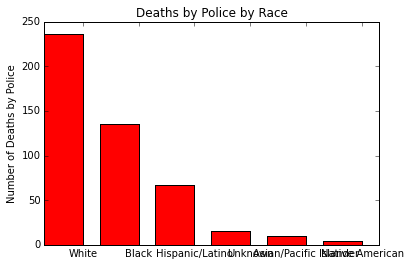

In [23]:
killings_by_race = police_killings["raceethnicity"].value_counts()

races = killings_by_race.index
killings = killings_by_race.data

N = len(races)
ind = np.arange(N)
width = 0.70

fig, ax = plt.subplots()
rects = ax.bar(ind, killings, width, color="r")

ax.set_ylabel("Number of Deaths by Police")
ax.set_title("Deaths by Police by Race")
ax.set_xticks(ind + width)
ax.set_xticklabels(races)

plt.show()

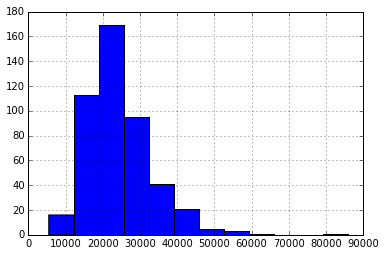

In [33]:
income = police_killings[police_killings["p_income"] != "-"]["p_income"]
income = income.astype(int)

income.hist(bins=12)
plt.show()

Google says that the median U.S. personal income is $51,939, for comparison.

In [34]:
state_pop = pd.read_csv("state_population.csv")

In [40]:
counts = police_killings["state_fp"].value_counts()
states = pd.DataFrame(data={"STATE": counts.index, "shootings": counts})
states = states.merge(state_pop, on="STATE")
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]

In [45]:
states.sort("rate")

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


Connecticut has the lowest rate of police killings, while Oklahoma has the highest.

In [56]:
share_white_filter = police_killings["share_white"] != "-"
share_black_filter = police_killings["share_black"] != "-"
share_hispanic_filter = police_killings["share_hispanic"] != "-"

pk = police_killings[share_white_filter & share_black_filter & share_hispanic_filter]
pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

/opt/dsserver/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [72]:
lowest_10_states = set(states.sort("rate").head(10)["STATE"])
highest_10_states = set(states.sort("rate", ascending=False).head(10)["STATE"])

killings_in_lowest_10 = pk[pk["state_fp"].isin(lowest_10_states)]
killings_in_highest_10 = pk[pk["state_fp"].isin(highest_10_states)]

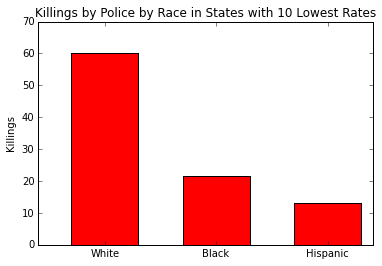

In [88]:
N = 3

share_white_mean_lowest = killings_in_lowest_10["share_white"].mean()
share_black_mean_lowest = killings_in_lowest_10["share_black"].mean()
share_hispanic_mean_lowest = killings_in_lowest_10["share_hispanic"].mean()

means = [share_white_mean_lowest, share_black_mean_lowest, share_hispanic_mean_lowest]

ind = np.arange(N)
width = 0.60

fig, ax = plt.subplots()
rects1 = ax.bar(ind + .5 * width, means, width, color="red")

ax.set_ylabel("Killings")
ax.set_title("Killings by Police by Race in States with 10 Lowest Rates")
ax.set_xticks(ind + width)
ax.set_xticklabels(["White", "Black", "Hispanic"])

plt.show()

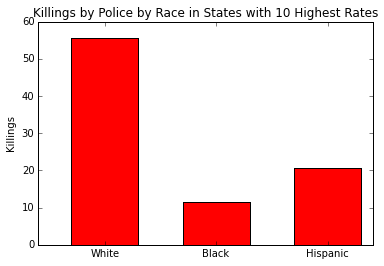

In [89]:
N = 3

share_white_mean_highest = killings_in_highest_10["share_white"].mean()
share_black_mean_highest = killings_in_highest_10["share_black"].mean()
share_hispanic_mean_highest = killings_in_highest_10["share_hispanic"].mean()

means = [share_white_mean_highest, share_black_mean_highest, share_hispanic_mean_highest]

ind = np.arange(N)
width = 0.60

fig, ax = plt.subplots()
rects1 = ax.bar(ind + .5 * width, means, width, color="red")

ax.set_ylabel("Killings")
ax.set_title("Killings by Police by Race in States with 10 Highest Rates")
ax.set_xticks(ind + width)
ax.set_xticklabels(["White", "Black", "Hispanic"])

plt.show()